In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-20 14:45:09.543444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I(ii) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone13/iPhone13_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0234375+0.0078125j 0.0234375+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
110831
(2048, 110831)
[0.01812677 0.00948843 0.00374635 ... 0.00173856 0.00339424 0.00953503]
0
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0234375+0.0078125j 0.015625 +0.j        ...
 0.03125  +0.j        0.015625 +0.015625j  0.015625 +0.015625j ]
2048
129100
(2048, 129100)
[0.0181794  0.00955586 0.00382046 ... 0.00183343 0.00367072 0.00966199]
1
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.0078125-0.015625j  0.0234375-0.0078125j ...
 0.0078125+0.j        0.015625 +0.j        0.015625 +0.j       ]
2048
109132
(2048, 109132)
[0.0182145  0.00951279 0.00374896 ... 0.00194378 0.00367706 0.00947664]
2
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.03125  +0.j        0.0078125-0.0078125j ...
 0.0234375-0.0078125j 0.0234375+0.015625j  0.0234375+0.0078125j]
2048
127272
(2048, 127272)
[0.01857133 0.00952372 0.00331539 ... 0.00185035 0.00354866 0.0094942

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-20 14:59:32.921232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 18s 6ms/step - loss: 13.4901 - accuracy: 0.1391
test loss, test acc: [13.49012279510498, 0.13905000686645508]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0    0    0    0    0    0    0  297 9703    0]
 [   0    0    0    0    3    3    1    0 9993    0]
 [   1    0    0    0    0    0    0    1 9998    0]
 [   0 2976    0    0    5   20    2    0 6997    0]
 [   1   30    0    0   14  388    3    0 9564    0]
 [   0 3107  137    4   17 6516    1    0  218    0]
 [   1 1534    1    0  478 6993    1    0  992    0]
 [  25   26    2    0    0   38    1    0 9908    0]
 [   0    0    1    0    0   26    0 2599 7374    0]
 [   1 5113  390    5    9 4448    2    0   32    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.03      0.00      0.00     10000
           5       0.35      0.65      0.46     10000
           6       0.09      0.0

Test Accuracy:0.13905


Text(0.5, 1.0, 'Accuracy:0.139')

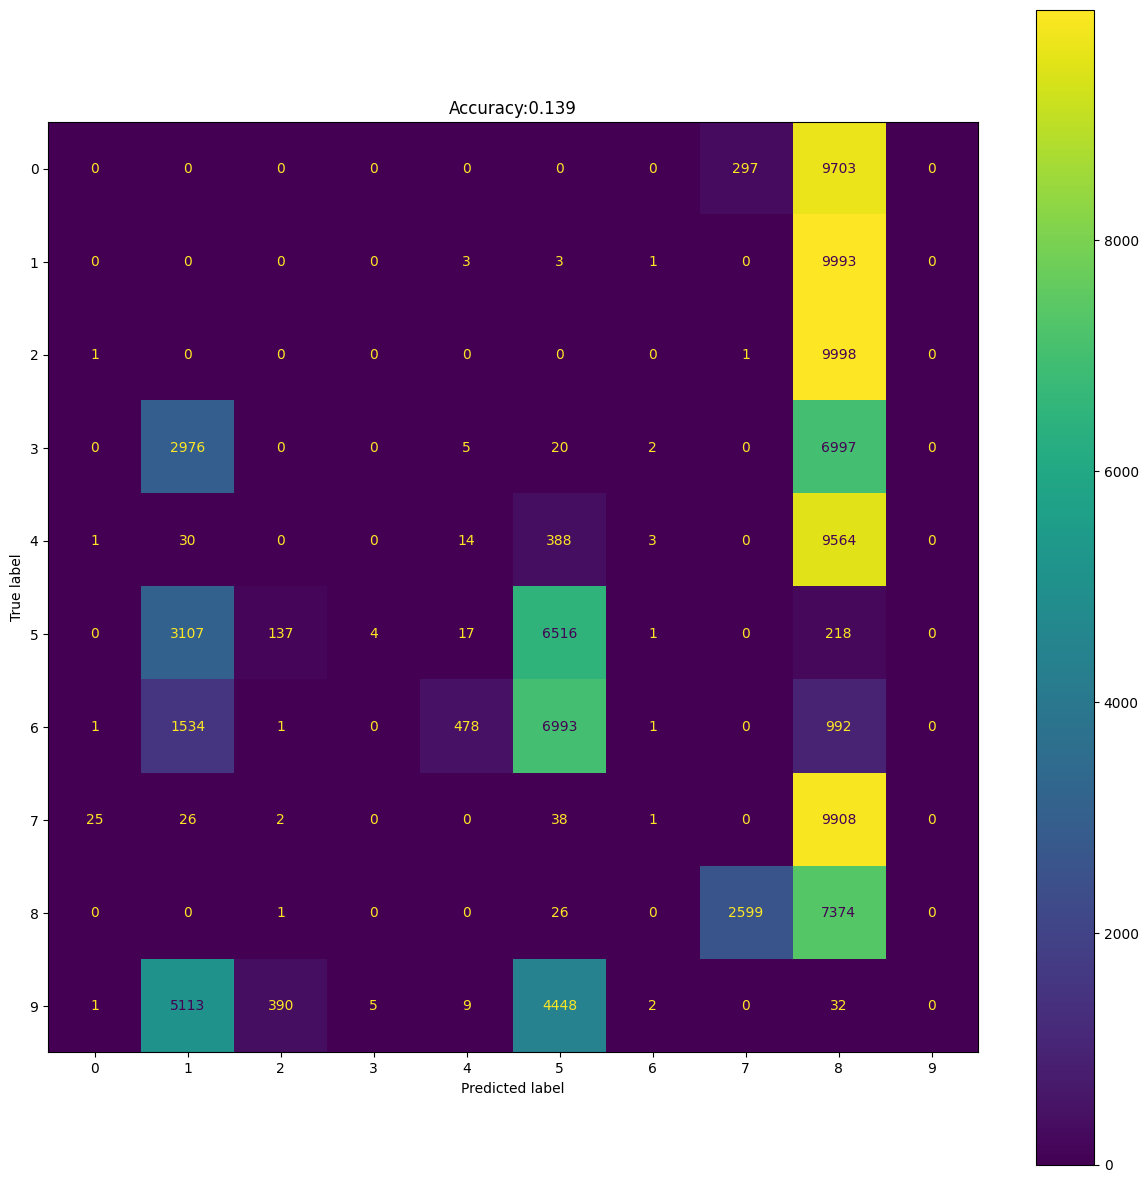

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.0797 - accuracy: 0.3790
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9106 - accuracy: 0.6671
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.7979 - accuracy: 0.7142
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7399 - accuracy: 0.7388
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.7017 - accuracy: 0.7536
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6734 - accuracy: 0.7652
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6508 - accuracy: 0.7743
Epoch 8/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6323 - accuracy: 0.7814
Epoch 9/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6170 - accuracy: 0.7872
Epoch 10/30
3125/3125 [==============================] - 16s 5ms/step - l

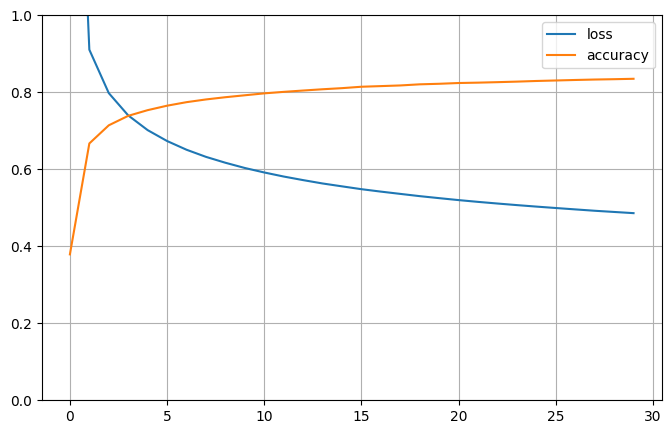

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.4833 - accuracy: 0.8370
test loss, test acc: [0.4832748472690582, 0.8369699716567993]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[8582    0  532    0    0    0    0  694  192    0]
 [   0 7830  722  196 1181   12    1   58    0    0]
 [ 503  365 7960    3  171    0    0  997    1    0]
 [   0  176    0 9789    7   28    0    0    0    0]
 [   0  646  309   61 8549  182  117  133    0    3]
 [   0    1    0    4  108 6870 1374    0    0 1643]
 [   0    0    0    2  254 1032 8450    0    0  262]
 [ 729    5 1083   36   29   11    0 8026   74    7]
 [ 170    0    0    0    0    1    1   35 9793    0]
 [   0    1    0    4   15 1423  709    0    0 7848]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10000
           1       0.87      0.78      0.82     10000
           2       0.75      0.80      0.77     10000
           3       0.97      0.98      0.97     10000
           4       0.83      0.85      0.84     10000
           5       0.72      0.69      0.70     10000
           6       0.79      0.8

Test Accuracy:0.83697


Text(0.5, 1.0, 'Accuracy:0.837')

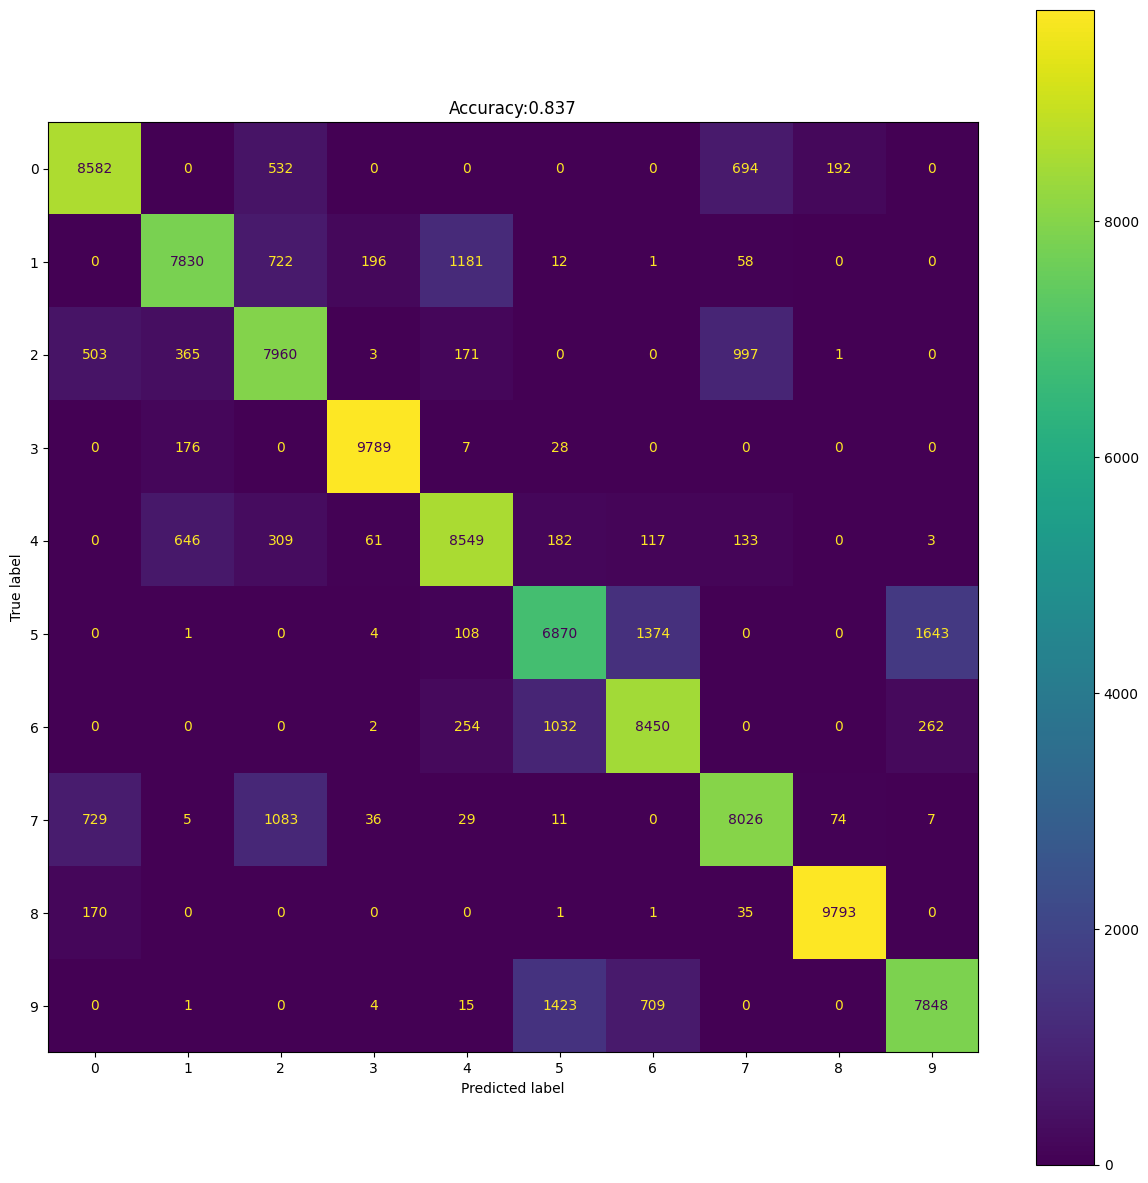

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 7.0471 - accuracy: 0.0923
test loss, test acc: [7.047077655792236, 0.09233000129461288]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 246 7819 1620   93   25    5  192    0    0    0]
 [  62   98 5482 4357    0    0    0    0    0    1]
 [ 671 2533 5051 1726    1    1   15    0    0    2]
 [  10  320 6427 3243    0    0    0    0    0    0]
 [  72  315 2839 6753    0    0   21    0    0    0]
 [ 883   22  597 8393    0    0  102    3    0    0]
 [ 262 1208 2267 5669    0    0  593    1    0    0]
 [ 863 5214 2921  662    1    3  336    0    0    0]
 [ 962 2678   12    2 1141 2173 3032    0    0    0]
 [1803   34  882 7235    0    0   44    0    0    2]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.03     10000
           1       0.00      0.01      0.01     10000
           2       0.18      0.51      0.27     10000
           3       0.09      0.32      0.13     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.14      0.0

Test Accuracy:0.09233


Text(0.5, 1.0, 'Accuracy:0.092')

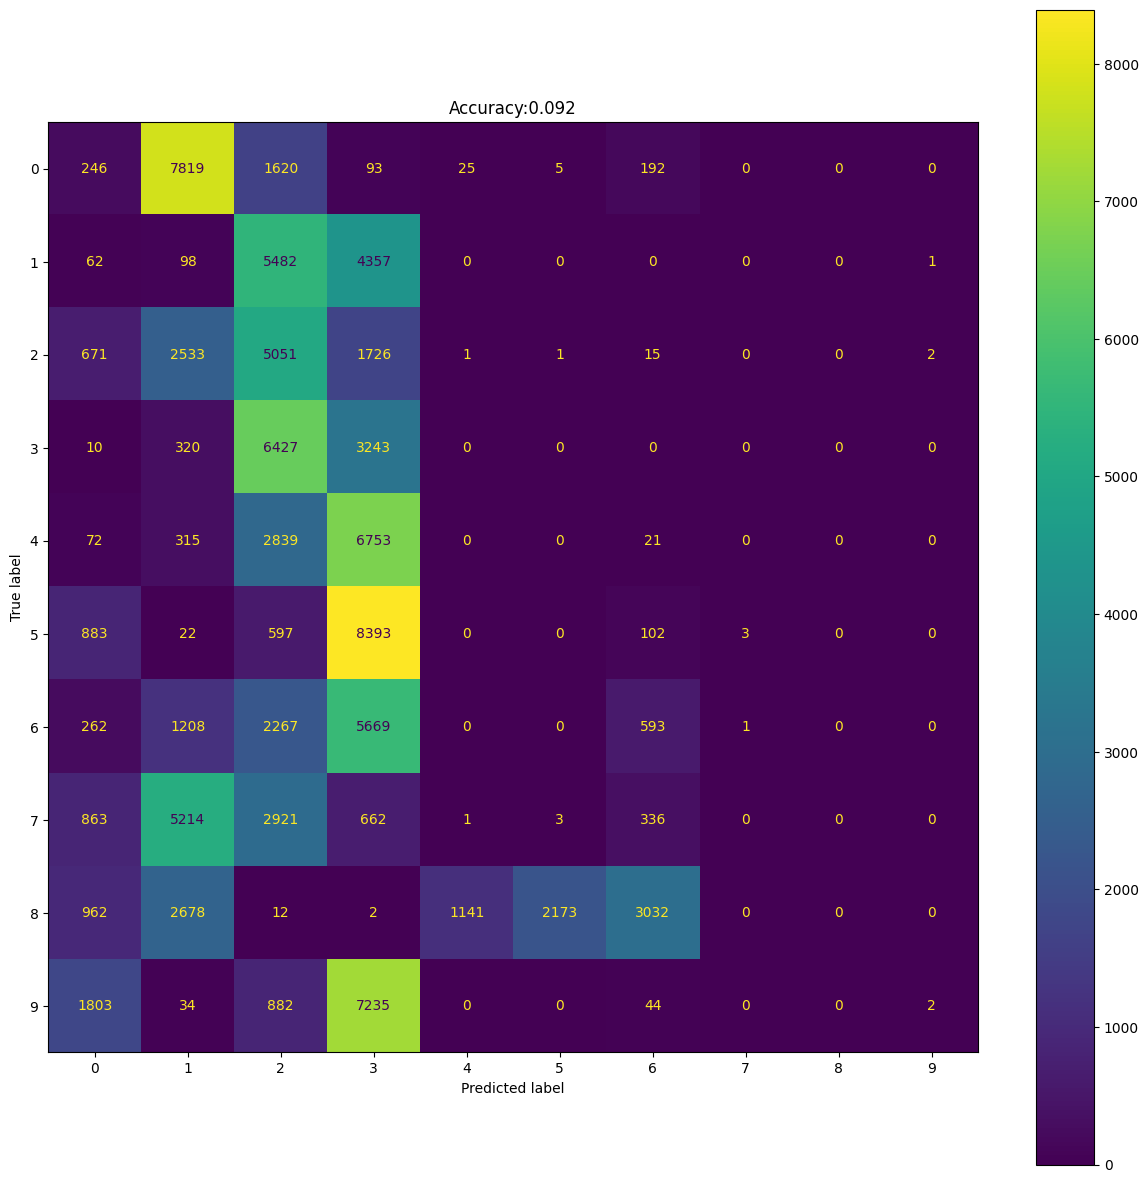

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.0924 - accuracy: 0.3391
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2874 - accuracy: 0.5153
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1703 - accuracy: 0.5541
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1142 - accuracy: 0.5776
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0776 - accuracy: 0.5949
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0499 - accuracy: 0.6071
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0281 - accuracy: 0.6169
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0096 - accuracy: 0.6259
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9938 - accuracy: 0.6320
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

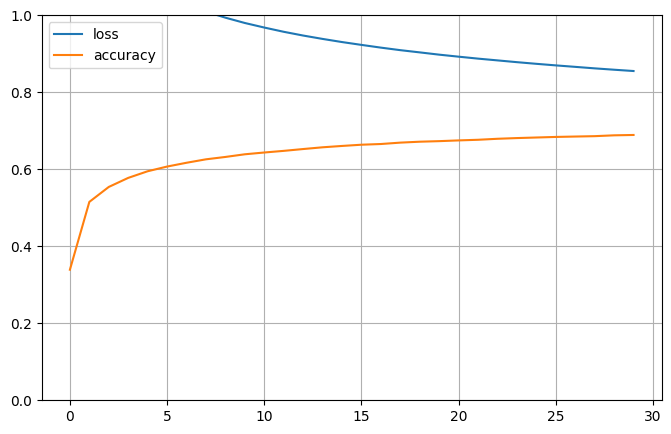

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.8525 - accuracy: 0.6899
test loss, test acc: [0.8525066375732422, 0.6899399757385254]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[7089    7  652   13   33    6  252 1459  479   10]
 [   7 7088  921  673  671  170  154   75    0  241]
 [ 653 1071 6254  200  342   51  269  984   24  152]
 [  55  203   82 9398  131    7   60   15    0   49]
 [ 109  792  509  405 5703  515 1301   88    0  578]
 [   5  197   68   25  450 5647 1146   65    4 2393]
 [ 341  130  222  112 1046  818 6341  254   11  725]
 [2071  181 1184   50   37   92  440 5632  246   67]
 [ 294    1    2    0    0    1    2  199 9501    0]
 [  23  204  144   78  495 1697  935   77    6 6341]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     10000
           1       0.72      0.71      0.71     10000
           2       0.62      0.63      0.62     10000
           3       0.86      0.94      0.90     10000
           4       0.64      0.57      0.60     10000
           5       0.63      0.56      0.59     10000
           6       0.58      0.6

Test Accuracy:0.68994


Text(0.5, 1.0, 'Accuracy:0.690')

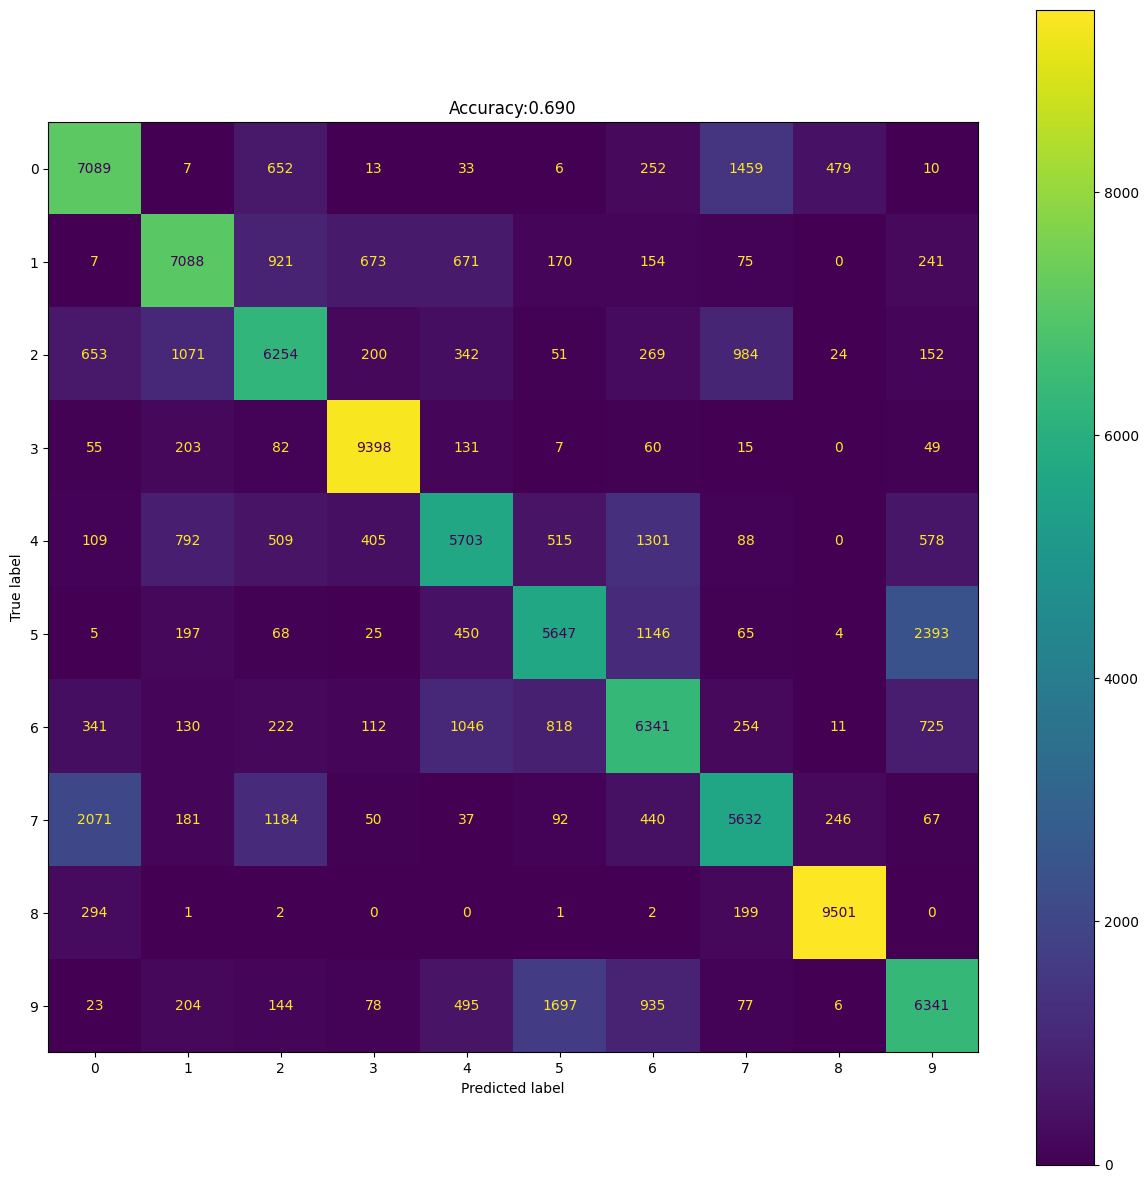

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_Besh model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 20.1451 - accuracy: 0.1957
test loss, test acc: [20.145143508911133, 0.19573000073432922]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[   0    0 1255    0    0    0    0 8745    0    0]
 [   1    3    0    0    2    0    0 9796    0  198]
 [   0    0    0    0    1    0    0 9998    1    0]
 [   2 3481    0    0 6495    1    0   21    0    0]
 [   0    1    0    0    4    4    1 8509    0 1481]
 [   0   20    0    0    9    1    0  437    0 9533]
 [   0    2    1    0    0    1    0  656    1 9339]
 [   1   30  105    0    0    2    1 9818    1   42]
 [   0    1 9973    0    0    0    0   25    0    1]
 [   0  234    0    0    1    2    0   16    0 9747]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.09      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.19573


Text(0.5, 1.0, 'Accuracy:0.196')

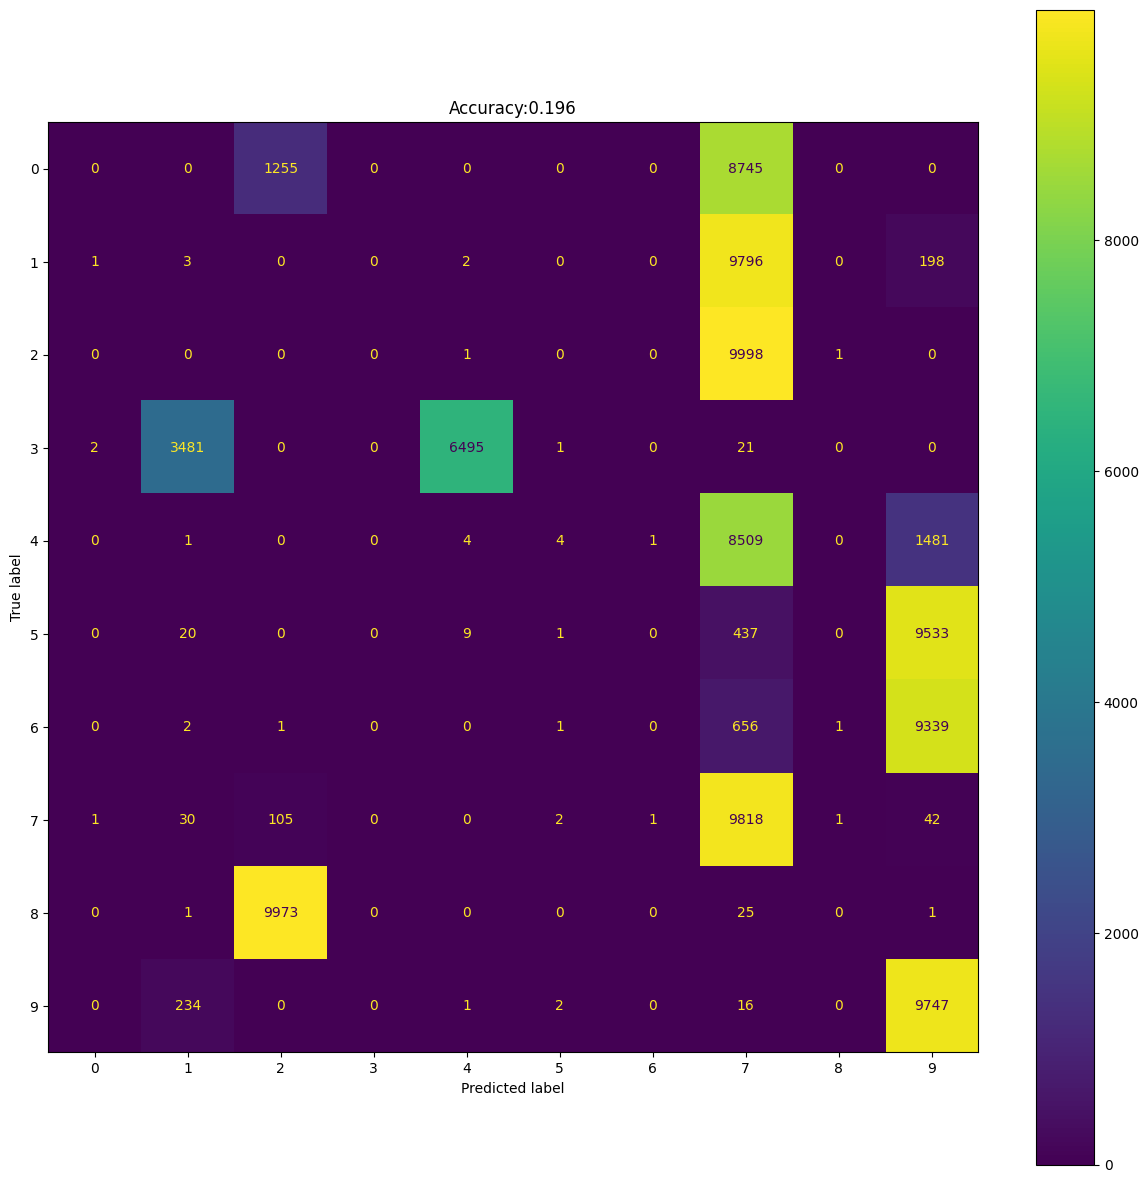

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [29]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 1.7723 - accuracy: 0.4496
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9072 - accuracy: 0.6741
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8020 - accuracy: 0.7232
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7481 - accuracy: 0.7434
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7120 - accuracy: 0.7554
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6874 - accuracy: 0.7634
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6679 - accuracy: 0.7688
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6518 - accuracy: 0.7732
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6391 - accuracy: 0.7764
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

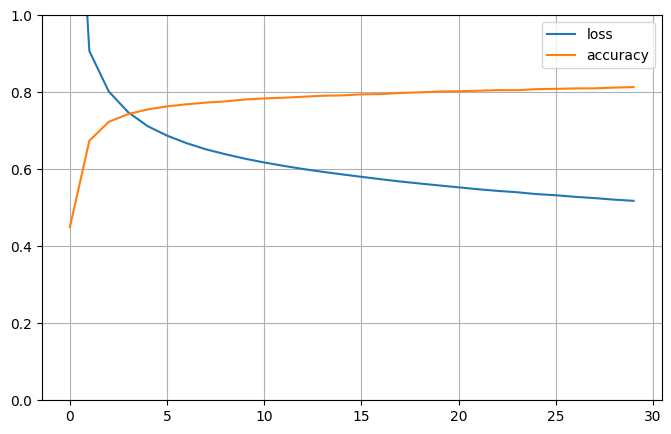

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 0.5184 - accuracy: 0.8116
test loss, test acc: [0.5183801054954529, 0.8115900158882141]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9172    0  287    0    1    0    0  410  130    0]
 [   0 9389  209    4  318    3    3   47    0   27]
 [ 767  876 6634    2  105    0    0 1616    0    0]
 [   0   18    0 9976    0    0    0    0    0    6]
 [   2 1034   99    8 7692  217  386  475    0   87]
 [   0   12    0    6  526 5423 1745    2    0 2286]
 [   0    0    0    2  641 1703 6027   57    0 1570]
 [ 604   86  433   21  139    0    8 8668    6   35]
 [ 190    0    0    1    0    0    0    4 9805    0]
 [   0    3    0    8   15 1061  540    0    0 8373]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10000
           1       0.82      0.94      0.88     10000
           2       0.87      0.66      0.75     10000
           3       0.99      1.00      1.00     10000
           4       0.82      0.77      0.79     10000
           5       0.65      0.54      0.59     10000
           6       0.69      0.6

Test Accuracy:0.81159


Text(0.5, 1.0, 'Accuracy:0.812')

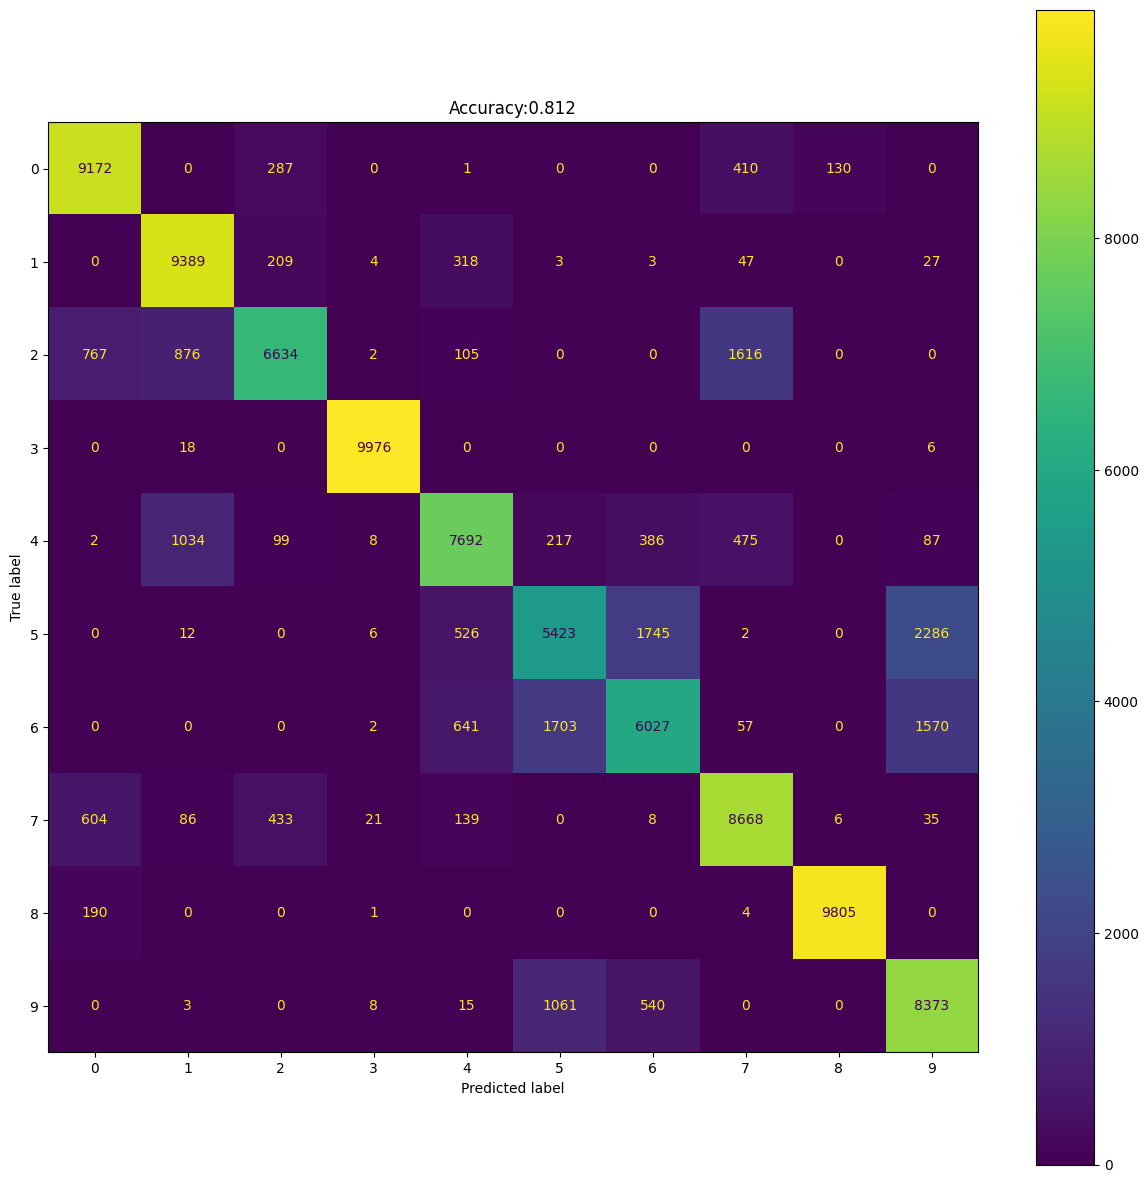

In [33]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [34]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [35]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 5.6397 - accuracy: 0.1931
test loss, test acc: [5.639679431915283, 0.19312000274658203]


In [36]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[   0  389  515 4321 4579    0    0  196    0    0]
 [  25 5189    0 4363    0  158    0  265    0    0]
 [   1 2625   69 6548   77    5    0  675    0    0]
 [4500 1019    0 4215    0  266    0    0    0    0]
 [  35 6593   13 1916    1  695  392  354    0    1]
 [   3 1255    0   61    0 5229 1969 1410    0   73]
 [  61 2768   20 2199    2 1821 2980  146    2    1]
 [  41 2244  393 3721 2096    5   12 1487    1    0]
 [   0    1    0    3 9878    0    0   13  104    1]
 [ 110  141    0    3    0 7456 2196   56    0   38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.23      0.52      0.32     10000
           2       0.07      0.01      0.01     10000
           3       0.15      0.42      0.23     10000
           4       0.00      0.00      0.00     10000
           5       0.33      0.52      0.41     10000
           6       0.39      0.3

Test Accuracy:0.19312


Text(0.5, 1.0, 'Accuracy:0.193')

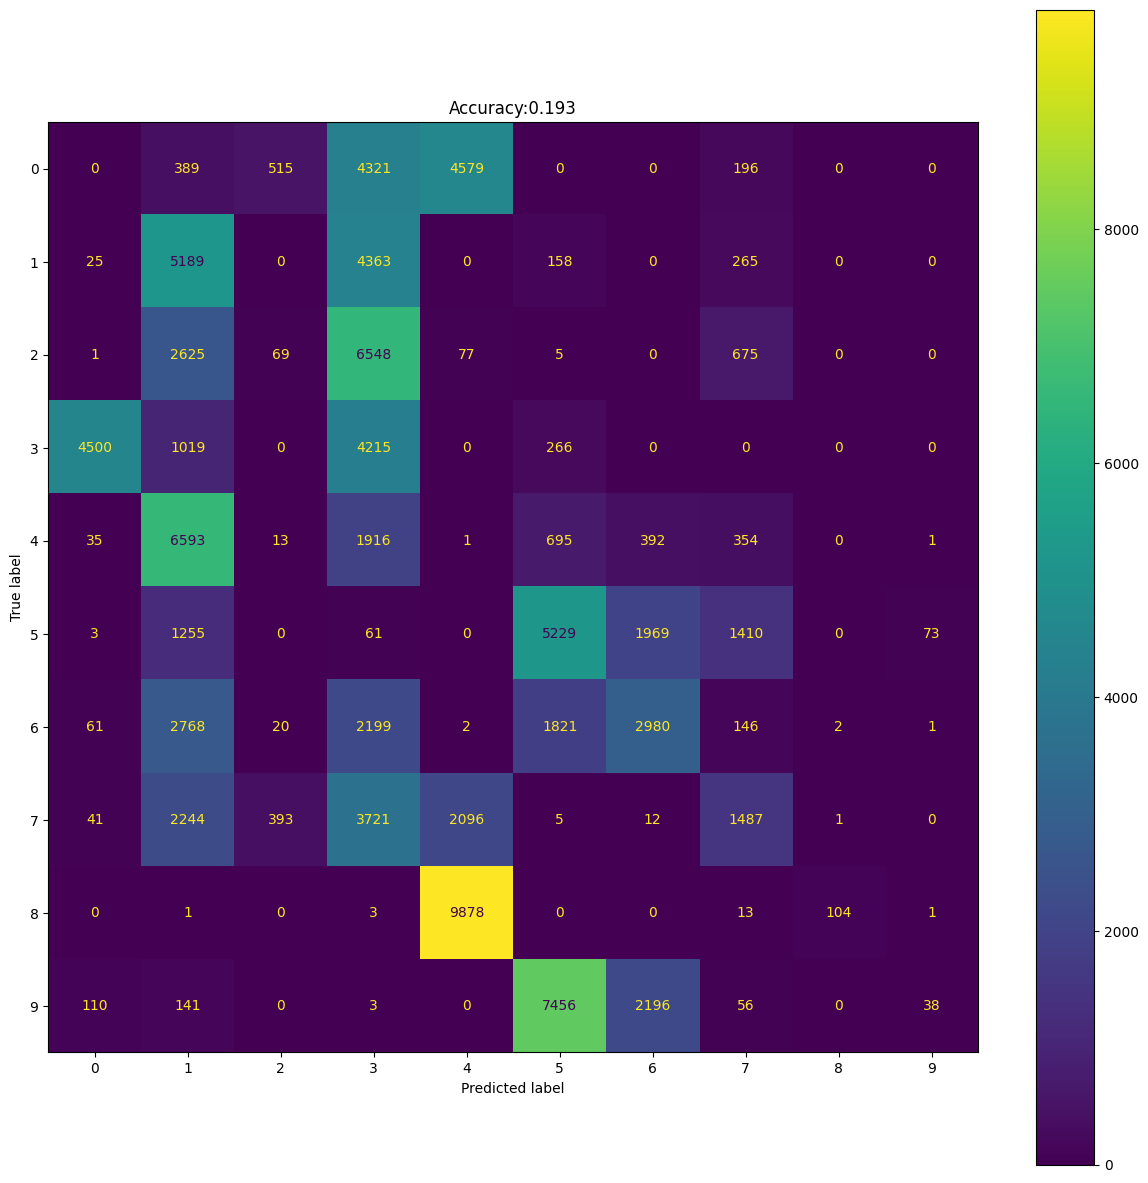

In [37]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [38]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.5602 - accuracy: 0.5179
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8804 - accuracy: 0.6628
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7776 - accuracy: 0.7081
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7258 - accuracy: 0.7312
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6929 - accuracy: 0.7441
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6698 - accuracy: 0.7533
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6523 - accuracy: 0.7610
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6383 - accuracy: 0.7663
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6267 - accuracy: 0.7706
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

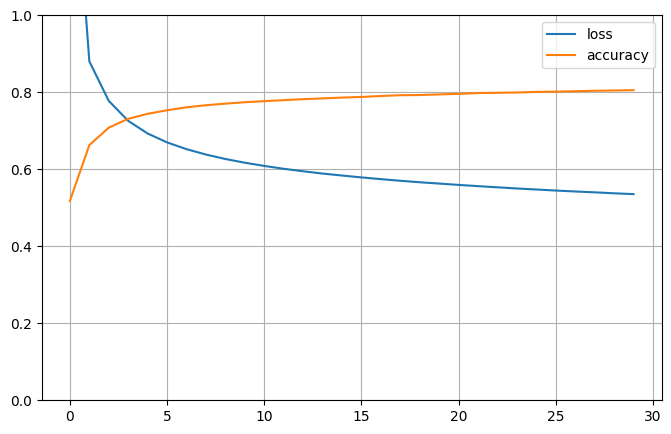

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [41]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.5341 - accuracy: 0.8068
test loss, test acc: [0.534077525138855, 0.8068299889564514]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[8170    0  521    0    1    1    0 1135  172    0]
 [   0 8188  594  495  688   21    3   10    0    1]
 [ 583  818 6893    3  364    8   20 1311    0    0]
 [   0  462    0 9523   11    1    0    0    0    3]
 [   3  600  269   75 7568  522  766  123    0   74]
 [   0   13    4    3  479 7046  765   22    0 1668]
 [   1   11   10   10  887  620 7959   94    0  408]
 [1413   13  844   17  101   10   26 7456   83   37]
 [ 141    0    0    0    1    1    0   39 9818    0]
 [   0    1    0    5   45 1465  422    0    0 8062]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     10000
           1       0.81      0.82      0.81     10000
           2       0.75      0.69      0.72     10000
           3       0.94      0.95      0.95     10000
           4       0.75      0.76      0.75     10000
           5       0.73      0.70      0.72     10000
           6       0.80      0.8

Test Accuracy:0.80683


Text(0.5, 1.0, 'Accuracy:0.807')

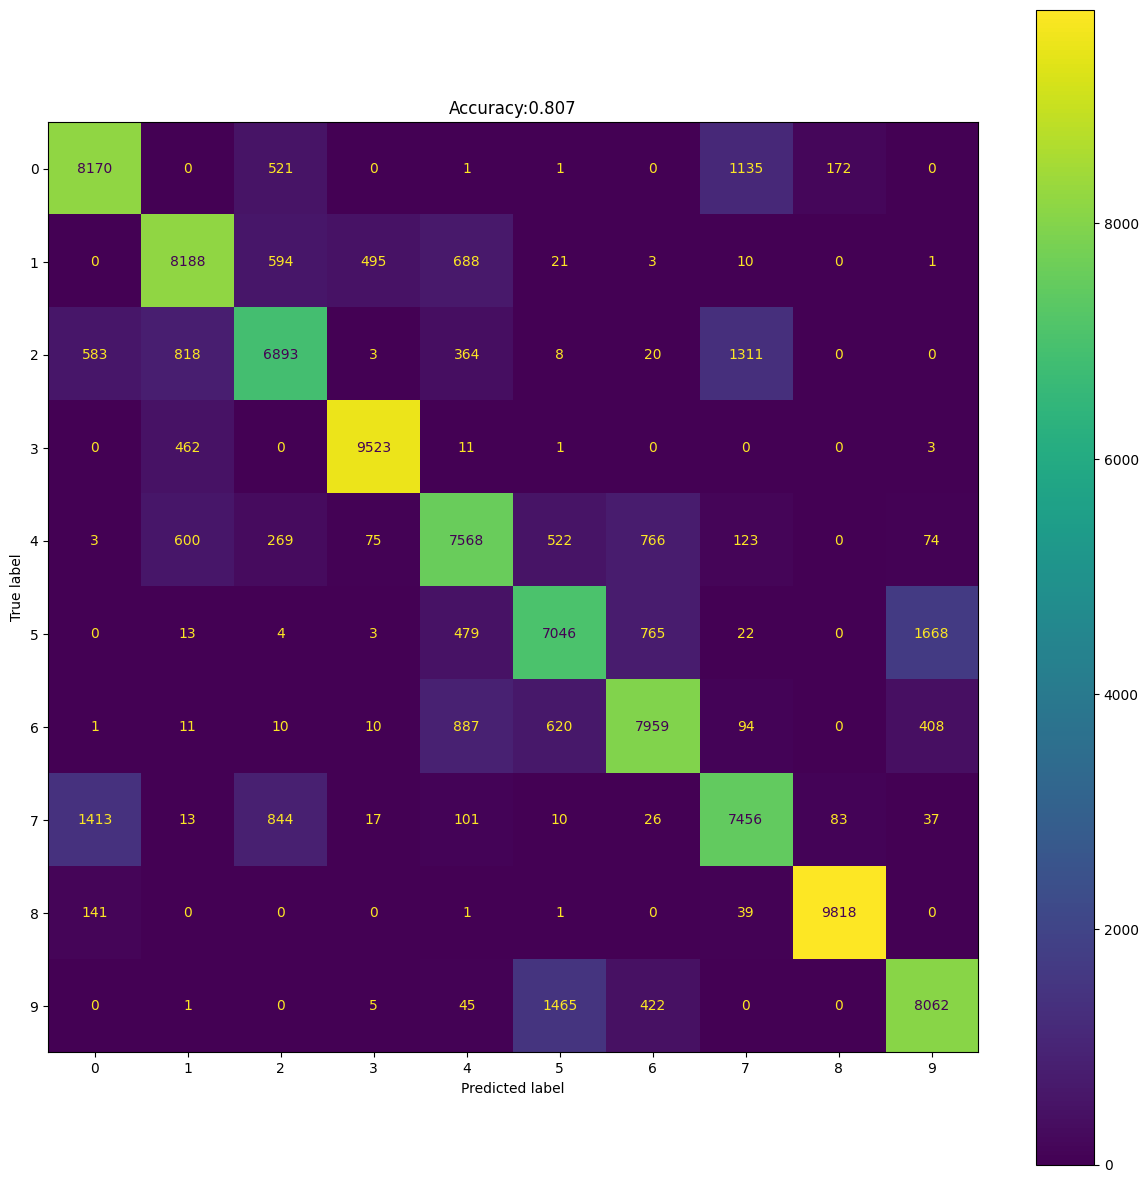

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [45]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [46]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 7.0139 - accuracy: 0.1491
test loss, test acc: [7.013946056365967, 0.1490900069475174]


In [47]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0   44 2475    0    3    0 1958 5520    0    0]
 [ 368 4114 4944    2  409    0   86    1   75    1]
 [   0  589 8611    0   46    1  631  121    1    0]
 [7582 1099  455    0  857    1    0    0    5    1]
 [ 487 6477 1080   36 1734    1    1    0  181    3]
 [ 735 1755 3296 2368    6   44    0    0 1398  398]
 [ 110 5196 1668  494    2   45   10    0 2047  428]
 [  28   80 4931   21    1    1 4715  210    6    7]
 [   0    0  623    1    0    0 1798 7578    0    0]
 [3106  379 2521 3039    8   72    0    0  689  186]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.21      0.41      0.28     10000
           2       0.28      0.86      0.42     10000
           3       0.00      0.00      0.00     10000
           4       0.57      0.17      0.27     10000
           5       0.27      0.00      0.01     10000
           6       0.00      0.0

Test Accuracy:0.14909


Text(0.5, 1.0, 'Accuracy:0.149')

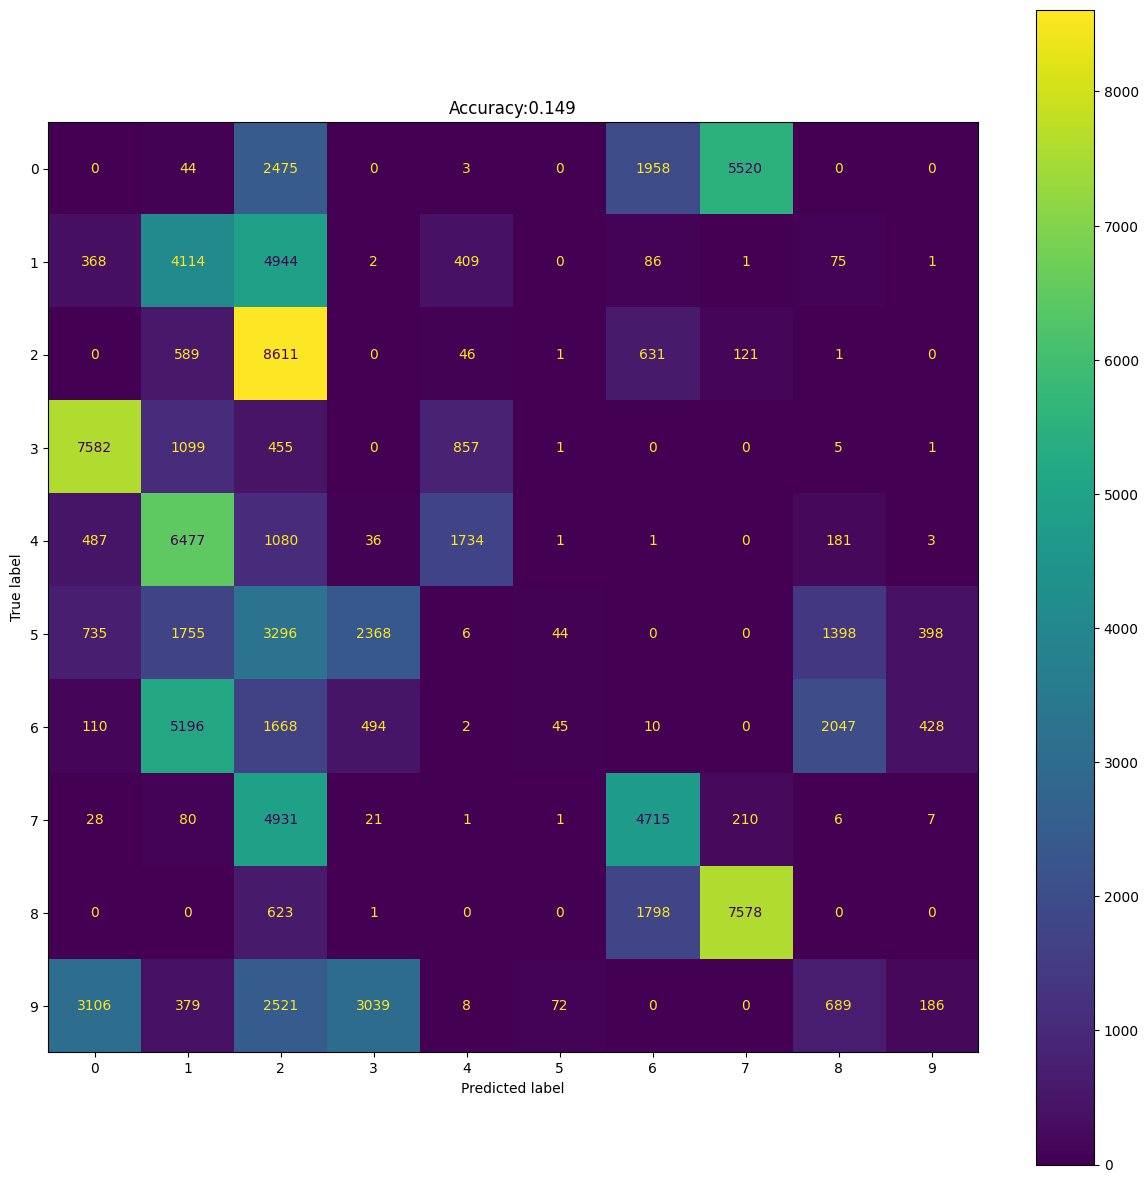

In [48]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [49]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [50]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.8088 - accuracy: 0.4253
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8897 - accuracy: 0.6651
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7834 - accuracy: 0.7090
Epoch 4/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.7323 - accuracy: 0.7302
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7010 - accuracy: 0.7436
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6793 - accuracy: 0.7509
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6628 - accuracy: 0.7566
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6503 - accuracy: 0.7603
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6400 - accuracy: 0.7638
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

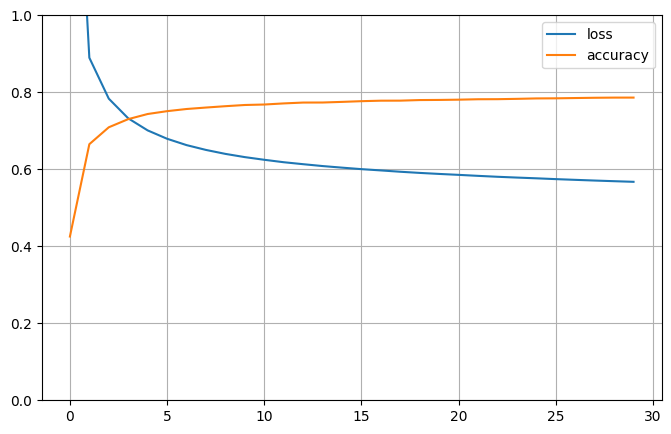

In [51]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [52]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5671 - accuracy: 0.7863
test loss, test acc: [0.567112386226654, 0.7862799763679504]


In [53]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[8664    1  486    0    0    0    0  710  139    0]
 [   3 7376  929  310  906   70  277   98    0   31]
 [ 766  891 7219    4   25    3    5 1087    0    0]
 [   0  278    3 9691   20    0    2    0    0    6]
 [   0 1046   48   63 7994  220  528    1    0  100]
 [   0   87    4    1  377 5100 1899    1    0 2531]
 [   0  192    3    3  520 1726 7313    9    0  234]
 [1217   71 1229    5    2    3    7 7321  100   45]
 [ 187    0    0    0    0    1    1   36 9775    0]
 [   0   32    0    2  154 1390  247    0    0 8175]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     10000
           1       0.74      0.74      0.74     10000
           2       0.73      0.72      0.72     10000
           3       0.96      0.97      0.97     10000
           4       0.80      0.80      0.80     10000
           5       0.60      0.51      0.55     10000
           6       0.71      0.7

Test Accuracy:0.78628


Text(0.5, 1.0, 'Accuracy:0.786')

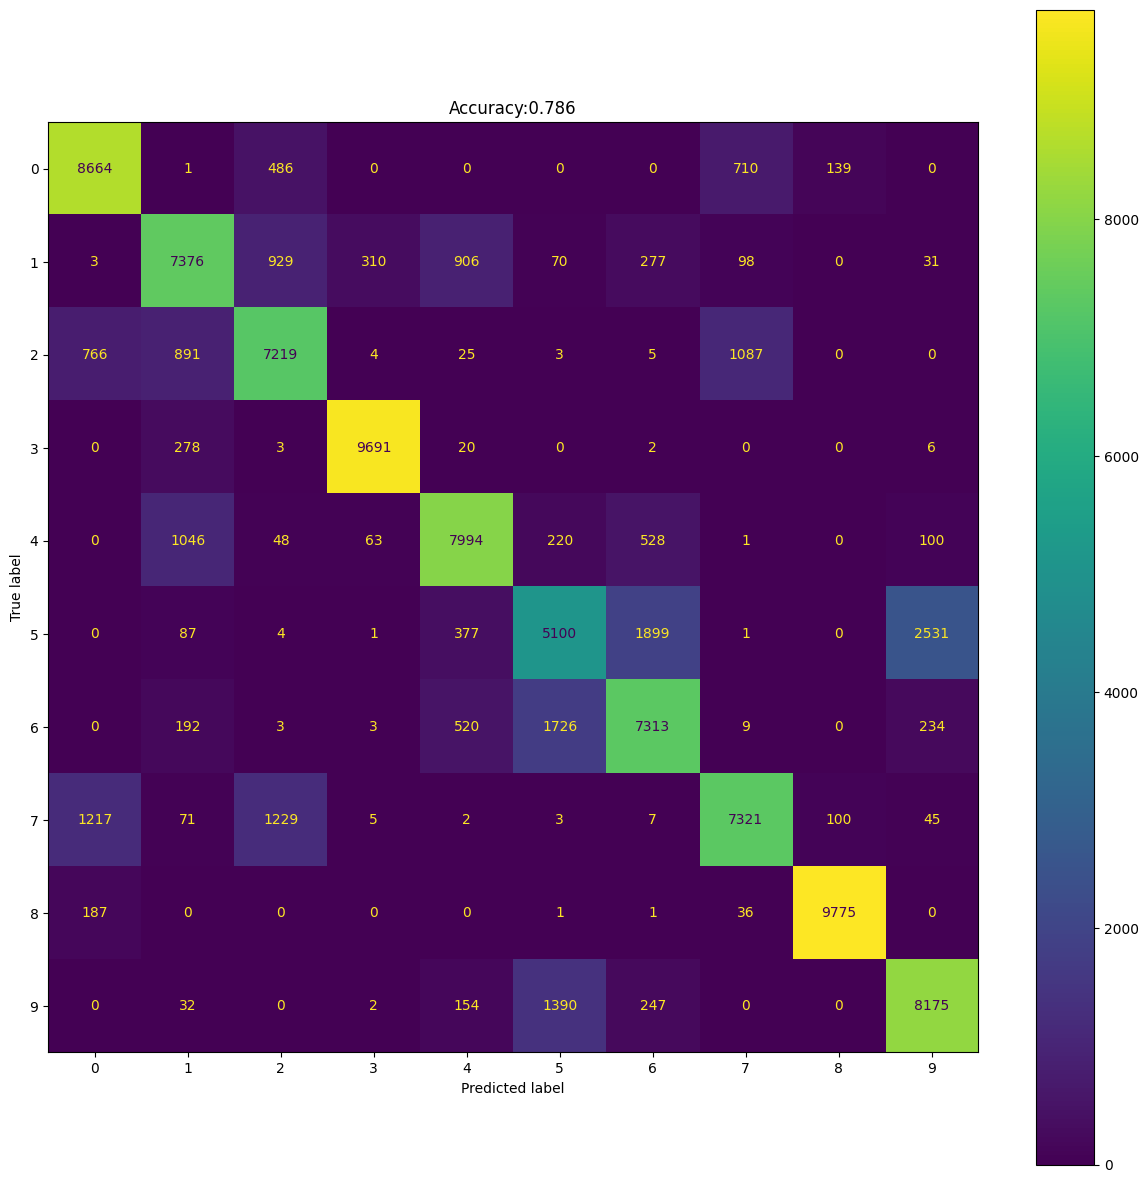

In [54]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [55]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [56]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 8.1397 - accuracy: 0.2102
test loss, test acc: [8.139724731445312, 0.21017999947071075]


In [57]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[   0 1375    0 8559    0    0    0   66    0    0]
 [   0 9094    0  226    0    1    0    0  679    0]
 [   0 7584    0 2411    0    3    0    0    2    0]
 [   0 7888    0    4    1    0    0    0 2107    0]
 [   0 7167    0    1    2 2507    1    0  175  147]
 [   0   37    0    0    0 5603  233    0    0 4127]
 [   1  255    0    0    0 9076   22    1    0  645]
 [  20 9494    0  216    2    0    0  243    0   25]
 [   0   20    0  547    0    1    0 9432    0    0]
 [   1    2    0    1    1 2953  992    0    0 6050]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.21      0.91      0.34     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.33      0.00      0.00     10000
           5       0.28      0.56      0.37     10000
           6       0.02      0.0

Test Accuracy:0.21018


Text(0.5, 1.0, 'Accuracy:0.210')

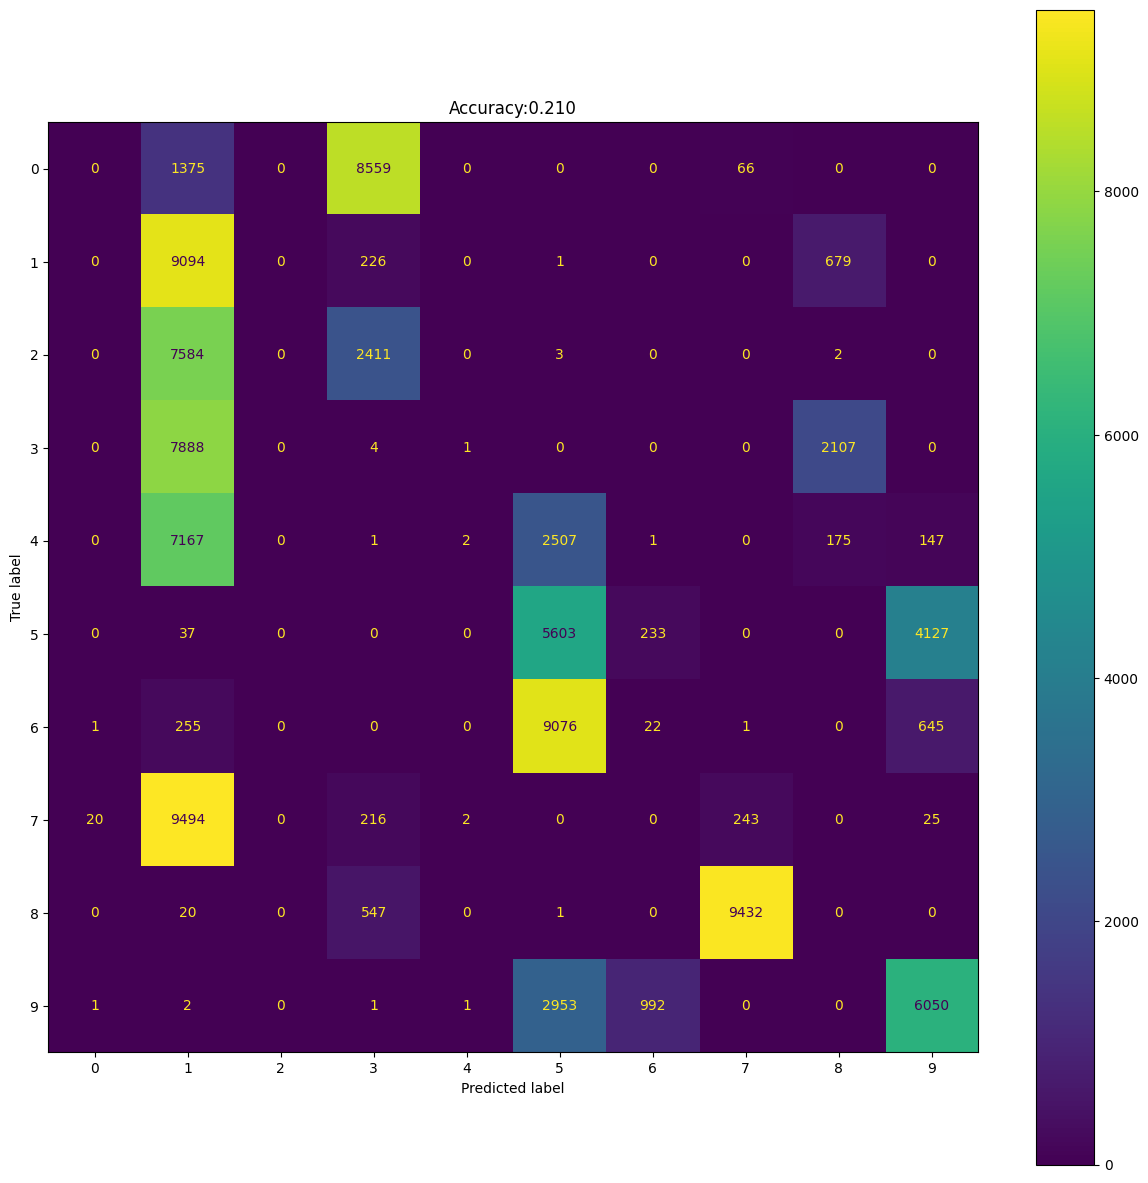

In [58]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [59]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [60]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.4384 - accuracy: 0.5647
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6329 - accuracy: 0.7739
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5645 - accuracy: 0.7968
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5294 - accuracy: 0.8069
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5060 - accuracy: 0.8137
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4890 - accuracy: 0.8191
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4759 - accuracy: 0.8224
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4653 - accuracy: 0.8255
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4565 - accuracy: 0.8279
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

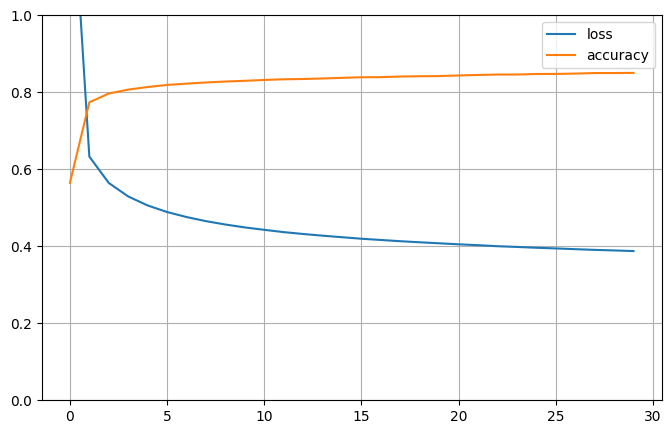

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [62]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.3861 - accuracy: 0.8509
test loss, test acc: [0.38608166575431824, 0.8509100079536438]


In [63]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[8871    0  329    0    0    0    0  631  169    0]
 [   0 8184  783  813  211    0    0    9    0    0]
 [ 146  636 8920    3   82    0    0  206    7    0]
 [   0  922    4 9043   30    0    0    1    0    0]
 [   0  169   60   26 9337   43  340   19    2    4]
 [   0    1    0    1  110 6231 1759    0    0 1898]
 [   0    0    0    1  310 1711 7808    1    0  169]
 [ 372    0  124   12    1   12    1 9383   85   10]
 [  99    0    0    0    0    0    1   48 9852    0]
 [   0    1    0    2    8 2205  321    1    0 7462]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10000
           1       0.83      0.82      0.82     10000
           2       0.87      0.89      0.88     10000
           3       0.91      0.90      0.91     10000
           4       0.93      0.93      0.93     10000
           5       0.61      0.62      0.62     10000
           6       0.76      0.7

Test Accuracy:0.85091


Text(0.5, 1.0, 'Accuracy:0.851')

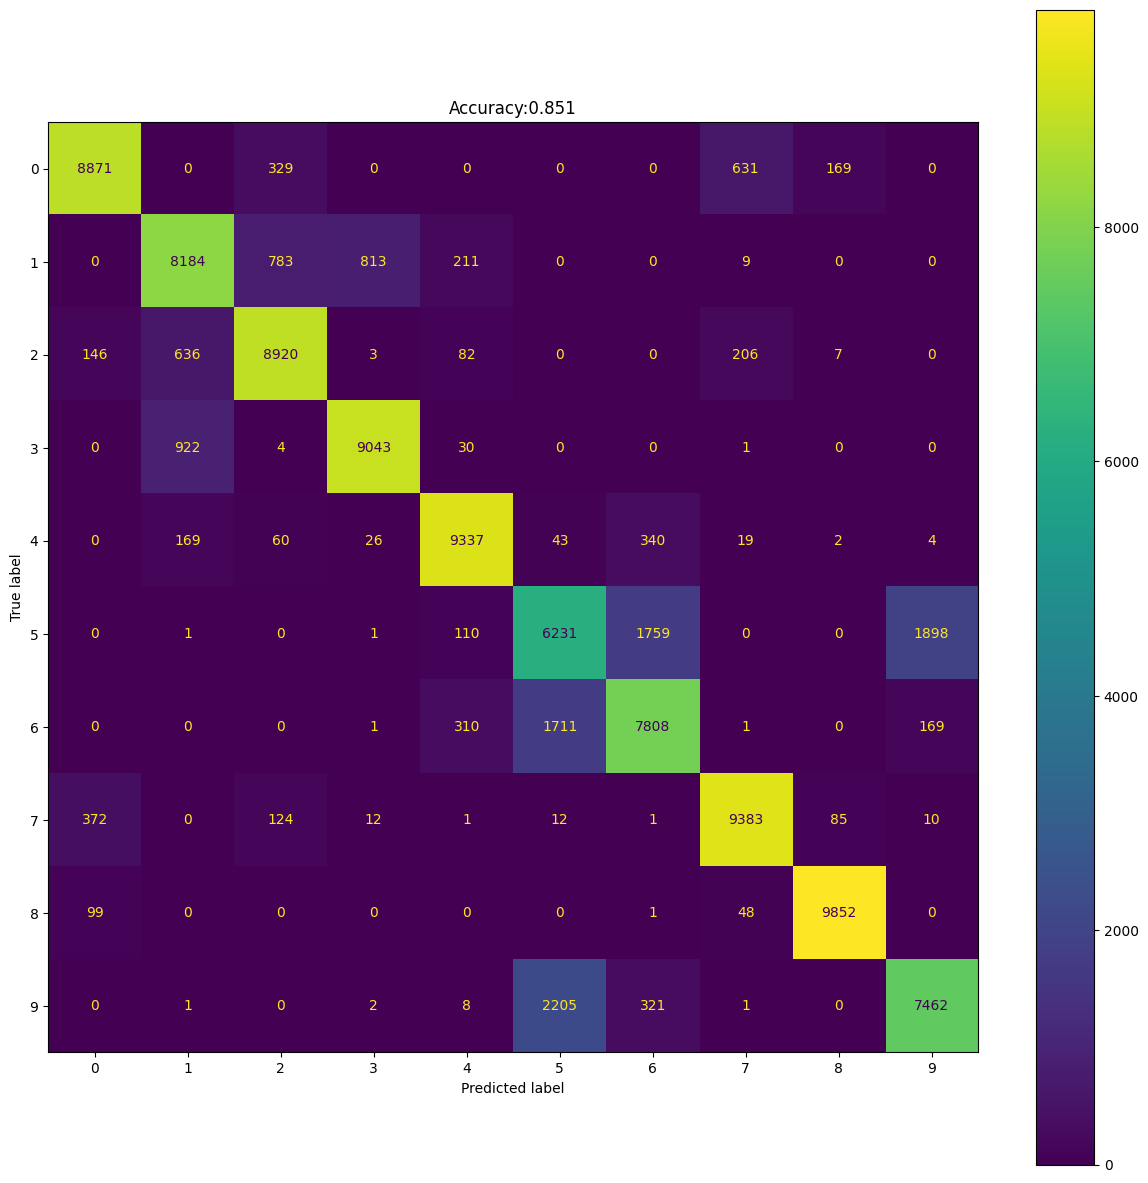

In [64]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [65]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [66]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 19s 6ms/step - loss: 22.2185 - accuracy: 0.1000
test loss, test acc: [22.218509674072266, 0.10002999752759933]


In [67]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[    0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     1     0     0  9998     1]
 [    0     0     0     0     0     1     2     0  9997     0]
 [    0     0     0     0     1     0     3    52  9944     0]
 [    0     0     0     1     1     0     7     1  9990     0]
 [    0     0     0     0     0     0     0     0  9999     1]
 [    0     0     0     1     1     1     0     0  9997     0]
 [   11     1     0     0     5     1     0     0  9978     4]
 [    0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     2     8     0  9988     2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.12      0.00      0

Test Accuracy:0.10003


Text(0.5, 1.0, 'Accuracy:0.100')

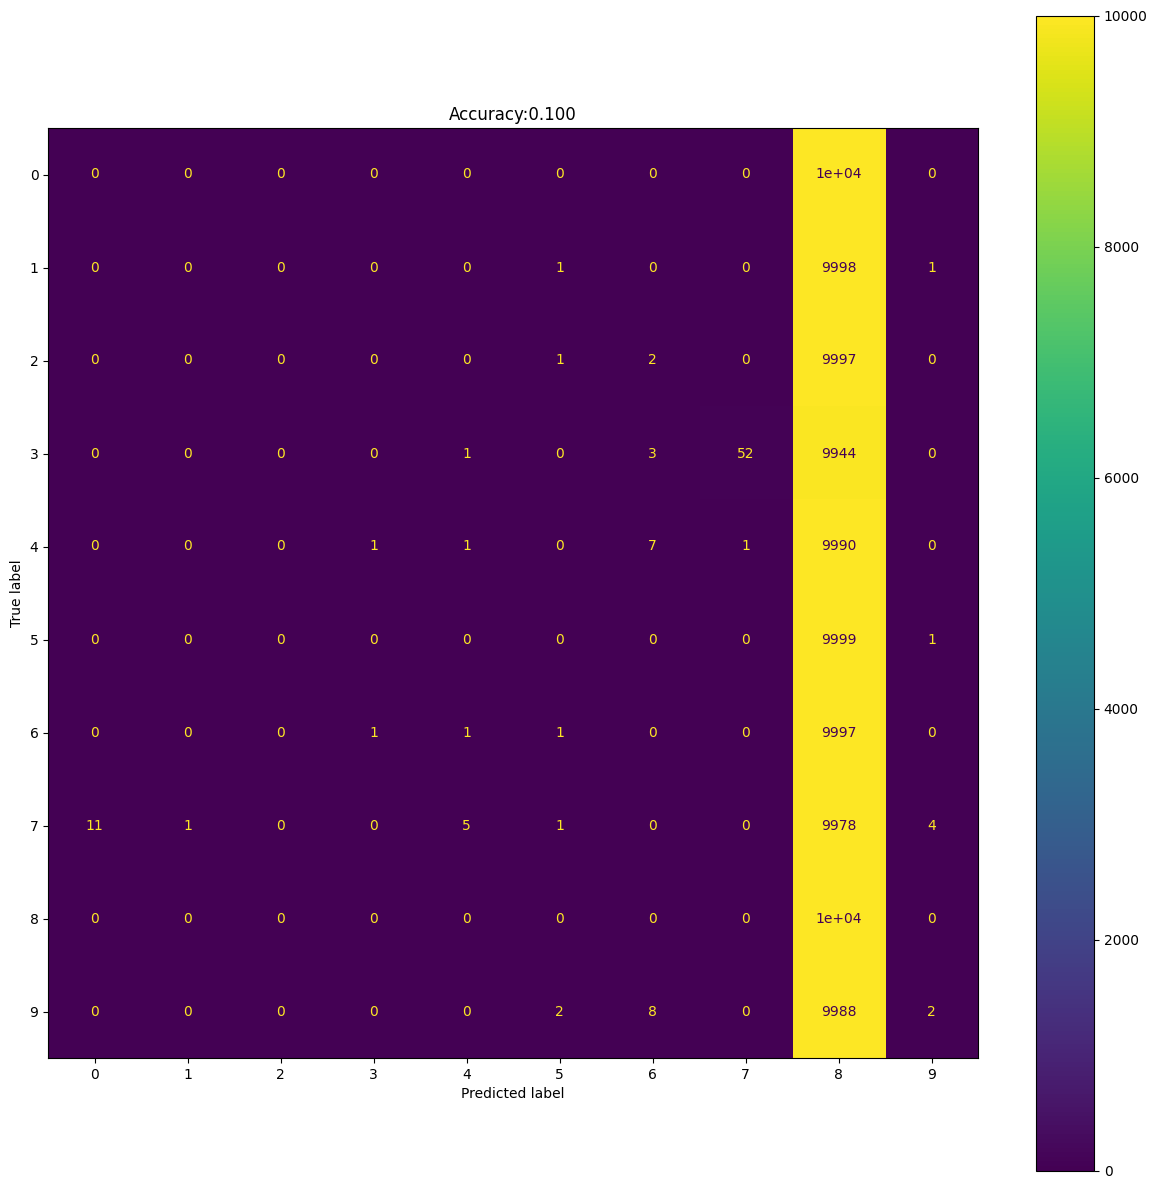

In [68]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [69]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [70]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3396 - accuracy: 0.2277
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.8052 - accuracy: 0.3650
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6355 - accuracy: 0.4343
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5258 - accuracy: 0.4836
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.4458 - accuracy: 0.5245
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.3842 - accuracy: 0.5542
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.3341 - accuracy: 0.5749
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2931 - accuracy: 0.5909
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2574 - accuracy: 0.6038
Epoch 10/30
3125/3125 [==============================] - 18s 6ms/step - l

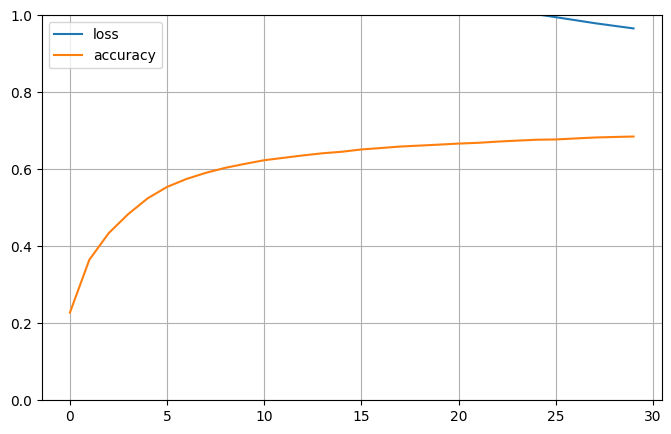

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [72]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.9616 - accuracy: 0.6868
test loss, test acc: [0.9615992903709412, 0.6868199706077576]


In [73]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[6182  257 2263    1   24    0    9  249 1015    0]
 [ 278 6795 2094   38  150   19  244  343   38    1]
 [1300 1481 5918    5  113    4  158  390  631    0]
 [   0   21    1 9876    0    0    6   35    0   61]
 [   0   88   33    4 9413  187  119   42   10  104]
 [   0  166   28   23  880 4712 2212  179   15 1785]
 [   0  207  155   16  263 1939 6291  256  122  751]
 [ 831  904 1993   62  317   96  465 4505  792   35]
 [ 372   22  333    2    4    0    4   18 9244    1]
 [   0   89   12   40  542 1794 1633  133   11 5746]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65     10000
           1       0.68      0.68      0.68     10000
           2       0.46      0.59      0.52     10000
           3       0.98      0.99      0.98     10000
           4       0.80      0.94      0.87     10000
           5       0.54      0.47      0.50     10000
           6       0.56      0.6

Test Accuracy:0.68682


Text(0.5, 1.0, 'Accuracy:0.687')

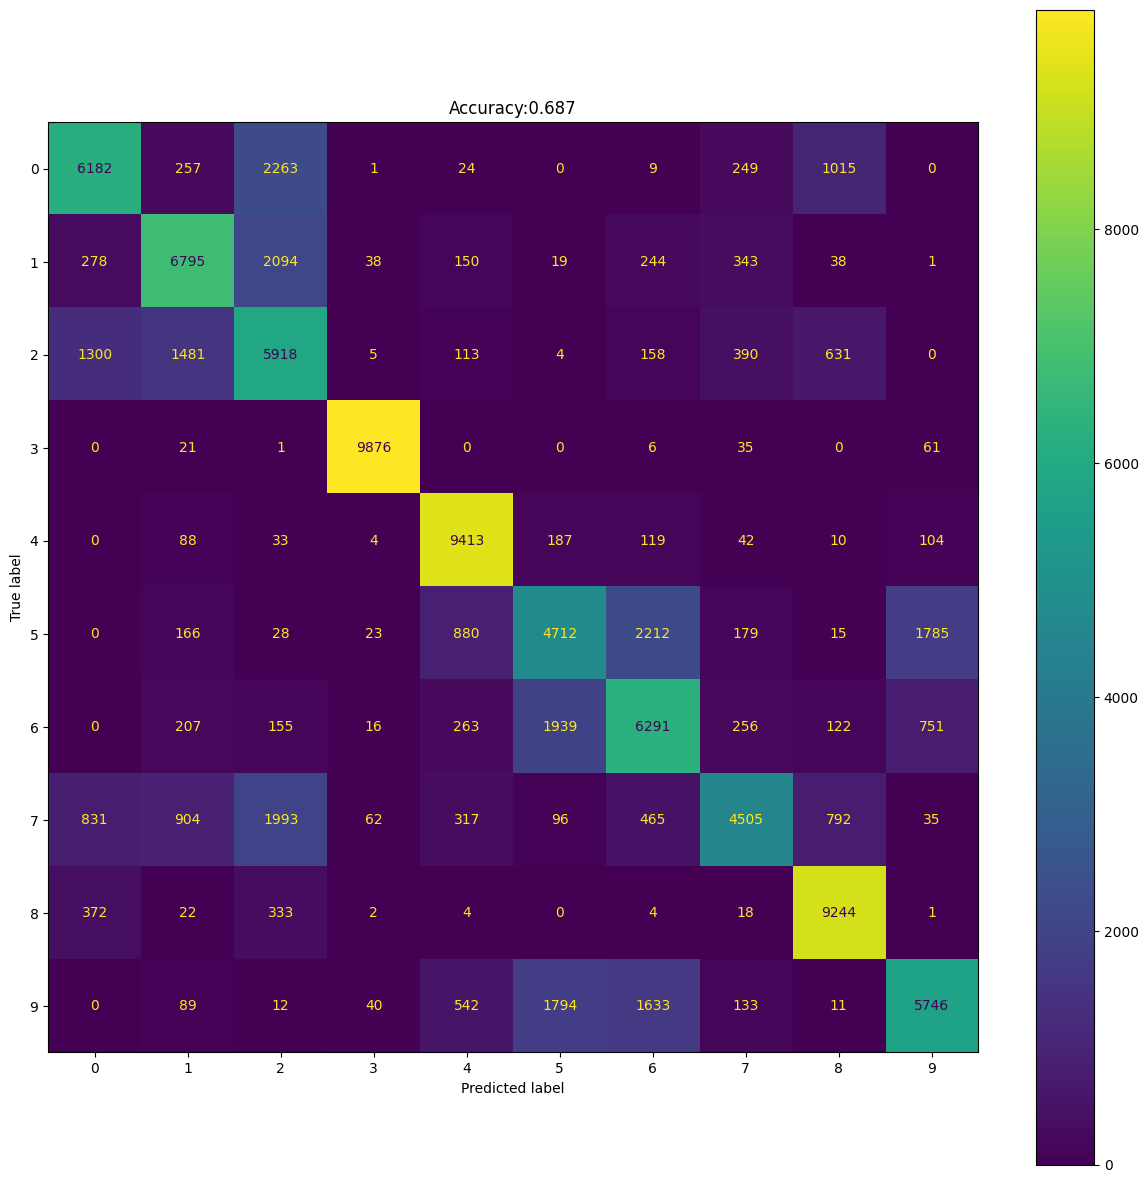

In [74]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')